# Project: Biodiversity Analysis

#### Project Goal: 
The goal of this project is to analyze biodiversity data at various national parks. The goal is to ensure the survival of species that are at-risk and maintain diversity within the parks. Therefore, the main objectives of this analysis will be to understand characteristics about the species and their conservation status at various national parks. Questions that this project aim to answer are:

- What is the distribution of conservation status for the various species?
- Are certain types of species more likely to be at-risk?
- Are the differences between species and their conservation status significant?
- Which mammal has the most prevalent number of species and what is its distribution amongst the parks?

#### Data: 
Both observations.csv and species_info.csv were provided by codecademy.com and contain observations of species in the past 7 days at park locations and information about each species, respectively. This data will be used to analyze the goals of the project. The data provided by codecademy.com is inspired by real data.

#### Analysis and Evaluation: 
Descriptive statistics and data visualization techniques will be employed to better understand the data. Statistical inference will also be used to test if the observed values are statistically significant. The aim of the output is to answer the questions first asked in the project goals.

## Load and explore the data

In [1]:
# import modules
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# load and examine observations.csv
df_obs = pd.read_csv('observations.csv')
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
# check dimensions of observations data
print(f"observations shape: {df_obs.shape}")

observations shape: (23296, 3)


In [4]:
# view unique scientific names and number of unique scientific names
print(f"unique scientific names:{df_obs.scientific_name.unique()}")
print(f"number of scientific names:{df_obs.scientific_name.nunique()}")

unique scientific names:['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
number of scientific names:5541


In [5]:
# view unique park names and number of unique park names
print(f"unique parks:{df_obs.park_name.unique()}")
print(f"number of parks:{df_obs.park_name.nunique()}")

unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
number of parks:4


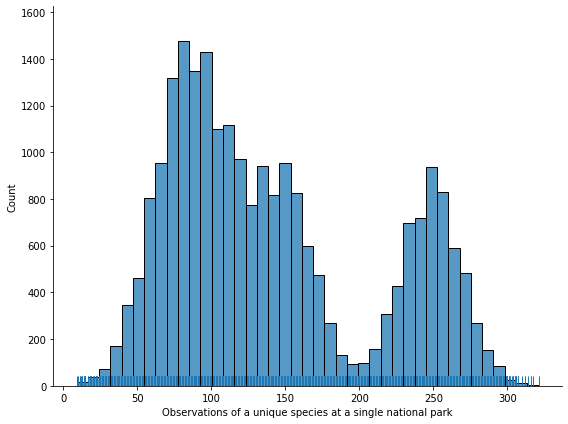

In [6]:
# view distribution of number of observations
sns.displot(df_obs.observations, rug=True, height = 6, aspect = 4/3)
plt.xlabel('Observations of a unique species at a single national park');

In [7]:
# load and examine species_info.csv
df_sp = pd.read_csv('species_info.csv')
df_sp.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
# check dimensions of species_info data
print(f"species_info shape: {df_sp.shape}")

species_info shape: (5824, 4)


In [9]:
# view unique categories and number of unique categories
print(f"categories:{df_sp.category.unique()}")
print(f"number of categories:{df_sp.category.nunique()}")

df_sp.groupby('category').size()

categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
number of categories:7


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [10]:
# view unique scientific names and number of unique scientific names
print(f"scientific names:{df_sp.scientific_name.unique()}")
print(f"number of scientific names:{df_sp.scientific_name.nunique()}")

df_sp.scientific_name.value_counts()

scientific names:['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
number of scientific names:5541


Procyon lotor                               3
Columba livia                               3
Streptopelia decaocto                       3
Canis lupus                                 3
Myotis lucifugus                            3
                                           ..
Bryohaplocladium virginianum                1
Ranunculus glaberrimus var. ellipticus      1
Mephitis mephitis                           1
Teucrium canadense var. canadense           1
Plagiobothrys stipitatus var. micranthus    1
Name: scientific_name, Length: 5541, dtype: int64

In [11]:
# view unique common names and number of unique common names
print(f"common names:{df_sp.common_names.unique()}")
print(f"number of common names:{df_sp.common_names.nunique()}")

common names:["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
number of common names:5504


In [12]:
# view unique conservation statuses and number of unique conservation statuses
print(f"conservation statuses:{df_sp.conservation_status.unique()}")
print(f"number of conservation statuses:{df_sp.conservation_status.nunique()}")

# na values in this column means species are not under any conservation status (no intervention)
print(df_sp.groupby('conservation_status').size())
print(f"na values:{df_sp.conservation_status.isna().sum()}")

conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
number of conservation statuses:4
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
na values:5633


## Analysis and Evaluation

### Clean conservation_status column and visualize distribution of conservation status for type of species

In [13]:
# replace na values with "No Intervention"
df_sp.fillna('No Intervention', inplace=True)
df_sp.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Note that the large majority of species are not part of conservation. 5633 not part of conservation vs 191 part of conservation.

In [14]:
# tabulate distribution of animal categories amongst conservation statuses
conservationCategory = df_sp[df_sp.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category']).common_names.count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


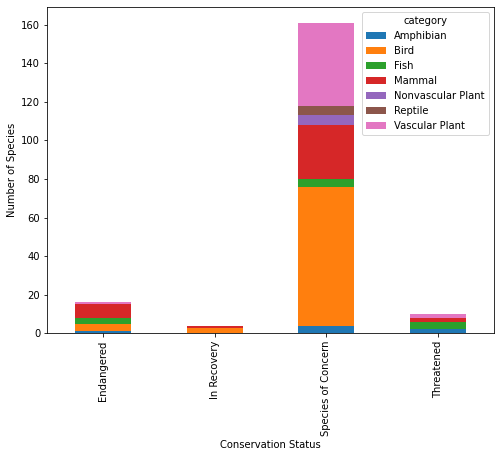

In [15]:
# visualize distribution of conservation status for type of species
ax = conservationCategory.plot(kind='bar', figsize=(8,6), stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species');

### Are certain types of species more likely to be at-risk?

In [16]:
# create new column called is_protected that is true for any species that has a value that is not "No Intervention"
df_sp['is_protected'] = df_sp.conservation_status != 'No Intervention'
df_sp.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [17]:
# view breakdown of each species type and protection status
category_counts = df_sp.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
category_counts = category_counts.pivot(index='category', columns='is_protected', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [18]:
# add a column that shows the percent of species within each category that are protected
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


##### Per the table above, mammals and birds are the most likely to be at risk.

### Are the differences between species and their conservation status significant?

Chi-squared tests will be run to see if different species have statisticaly significant differences in conservation status rates. A p-value threshold of 0.05 will be used for determining statistical significance.

#### Mammal vs Bird

In [19]:
from scipy.stats import chi2_contingency

# create contingency table using values from table directly above
contingency1 = [[30, 146], [75, 413]]

# run chi-squared test
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

##### The second value of 0.69 is the p-value, which is much larger than the threshold of 0.05. There does not seem to be a statisticaly significant difference in the rate of needed protection between mammals and birds.

#### Mammal and Reptile

In [20]:
# create contingency table using values from table directly above
contingency2 = [[30, 146], [5, 73]]

# run chi-squared test
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

##### The p-value of 0.038 is below the threshold of 0.05. Therefore, mammals have a statistically significant higher rate of needed protection compared to reptiles.

### Which mammal has the most prevalent number of species and what is its distribution amongst the parks?

In [21]:
# the common names of mammals will be analyzed
# first step is to split up into individual names
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = df_sp[df_sp.category == 'Mammal'].common_names.apply(remove_punctuations).str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [22]:
# remove duplicate words in each row
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [23]:
# collapse words into one list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [24]:
# count number of occurrences of each word
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values('Count', ascending=False).head(10)

,Word,Count
40,Bat,23
72,Shrew,18
102,Myotis,17
182,Mouse,16
82,Chipmunk,13
107,Squirrel,12
19,American,12
164,Vole,11
8,Eastern,11
188,Western,10


##### Bats have the most prevalent number of species amongst the mammals.

In [25]:
# figure out which rows in the species dataframe are referring to bats

# add column to check if a row item in the species dataframe is a bat
df_sp['is_bat'] = df_sp.common_names.str.contains(r"\bBat\b", regex=True)
df_sp.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [26]:
# check that there are 23 rows of is_bat = True to confirm the count determined in the table directly above
print(f"Value verified if equal to 23: {len(df_sp[df_sp.is_bat])}")

# view subset of data where is_bat is True
df_sp[df_sp.is_bat]

Value verified if equal to 23: 23


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [27]:
# merge with the observations dataframe to see observations of bats accross the four national parks
bat_observations = df_obs.merge(df_sp[df_sp.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [28]:
# view total number of observations at each park
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [29]:
# break down previous table by protected vs un-protected bat sightings
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


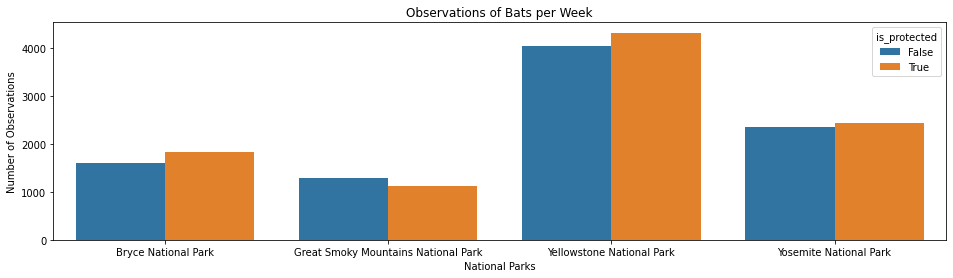

In [30]:
# view corresponding plot 
plt.figure(figsize=(16, 4))
sns.barplot(data=obs_by_park, x='park_name', y='observations', hue='is_protected')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week');

The distribution of bats across the parks is shown above. It can be interpreted that Bryce, Yellowstone, and Yosemite National Parks are doing well with their bat populations due to the fact that there are more sightings of protected bats compared to un-protected bats.